In [8]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split  # Use sklearn for train-test split

# Define your dataset path with double backslashes
dataset_path = 'C:/Users/Muhammad AinAin Khan/Documents/CUB_200_2011'


# Define data preprocessing and augmentation
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),  # Example data augmentation
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Adjust based on your dataset
])

# Load the dataset and split into training and testing sets
full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Split the dataset into training and testing sets (use sklearn's train_test_split)
train_dataset, test_dataset = train_test_split(full_dataset, test_size=0.2, random_state=42)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Print some information about the datasets
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of testing samples: {len(test_dataset)}")


Number of training samples: 9430
Number of testing samples: 2358


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


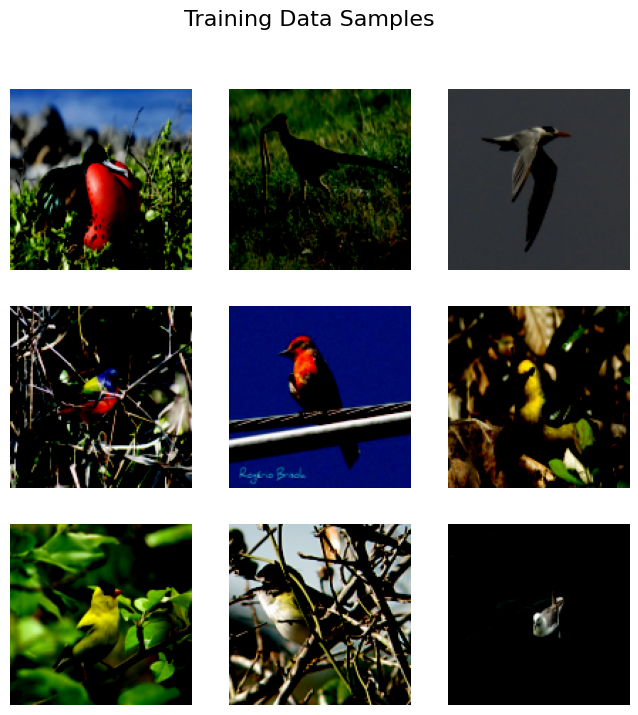

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


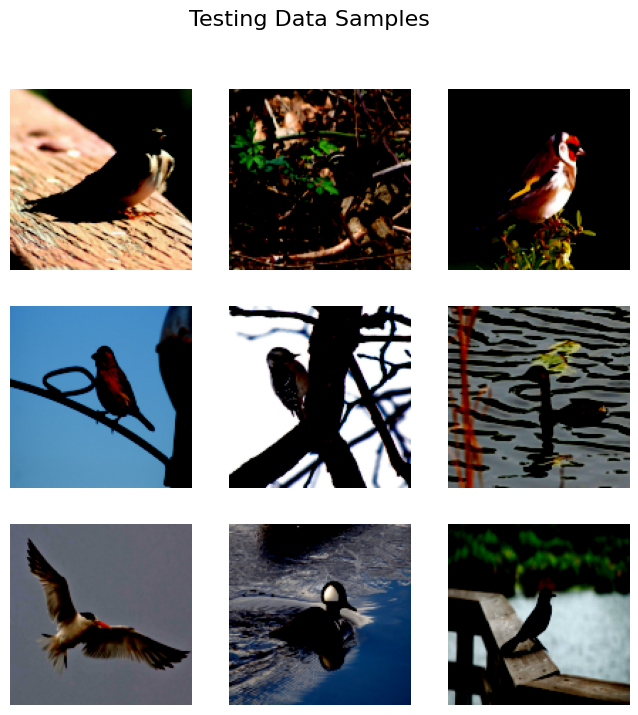

In [9]:
import matplotlib.pyplot as plt

# Visualize a few samples
def show_images(images, title):
    plt.figure(figsize=(8, 8))
    plt.suptitle(title, fontsize=16)
    for i in range(min(9, len(images))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].permute(1, 2, 0))
        plt.axis('off')
    plt.show()

# Get a batch of training data
train_batch = next(iter(train_loader))
test_batch = next(iter(test_loader))

# Show training data samples
show_images(train_batch[0], title='Training Data Samples')

# Show testing data samples
show_images(test_batch[0], title='Testing Data Samples')


In [10]:
# Define image dimensions and channels
image_height = 128
image_width = 128
num_channels = 3  # Assuming a color image with RGB channels

# Print the shape of the input layer
print(f"Input Layer Shape: ({num_channels}, {image_height}, {image_width})")


Input Layer Shape: (3, 128, 128)


In [11]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import torch.nn.functional as F
# Define the roll number
roll_number = 23052

# Calculate the number of filters for the convolutional layers
num_filters1 = roll_number % 16 + 16
num_filters2 = roll_number % 32 + 32
num_filters3 = roll_number % 64 + 64
class YourCNN(nn.Module):
    def __init__(self, num_channels=3, num_classes=1000):  #  num_classes based on your task
        super(YourCNN, self).__init__()


        # First Convolutional Layer
        self.conv1 = nn.Conv2d(in_channels=num_channels, out_channels=num_filters1, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Second Convolutional Layer
        self.conv2 = nn.Conv2d(in_channels=num_filters1, out_channels=num_filters2, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Third Convolutional Layer
        self.conv3 = nn.Conv2d(in_channels=num_filters2, out_channels=num_filters3, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully Connected (FC) Layers
        self.fc1 = nn.Linear(num_filters3 * (image_height // 8) * (image_width // 8), 512)  # Adjust the input size
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        # Forward pass through the layers
        x1 = self.conv1(x)
        x1 = self.relu1(x1)
        x1_pooled = self.pool1(x1)

        x2 = self.conv2(x1_pooled)
        x2 = self.relu2(x2)
        x2_pooled = self.pool2(x2)

        x3 = self.conv3(x2_pooled)
        x3 = self.relu3(x3)
        x3_pooled = self.pool3(x3)

        # Flatten the output for the fully connected layers
        x_flat = x3_pooled.view(x3_pooled.size(0), -1)

        # Fully Connected (FC) Layers
        x_fc1 = F.relu(self.fc1(x_flat))
        x_output = self.fc2(x_fc1)

        return x1, x2, x3, x_output

# Create an instance of your updated CNN
your_cnn = YourCNN()
# Load a sample image for visualization
sample_image = torch.randn(1, 3, 128, 128)  # Assuming input size is 128x128 with 3 channels
# Forward pass through the network
x1, x2, x3, x_output = your_cnn(sample_image)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Size of x1: torch.Size([32, 28, 128, 128])
Size of x2: torch.Size([32, 44, 64, 64])
Size of x3: torch.Size([32, 76, 32, 32])
Size of x_output: torch.Size([32, 1000])


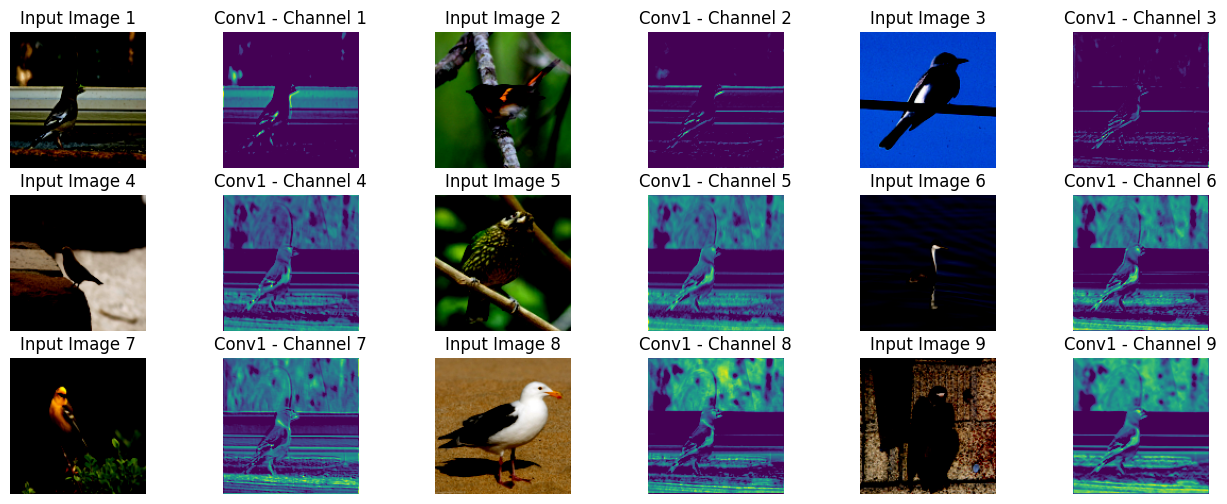

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


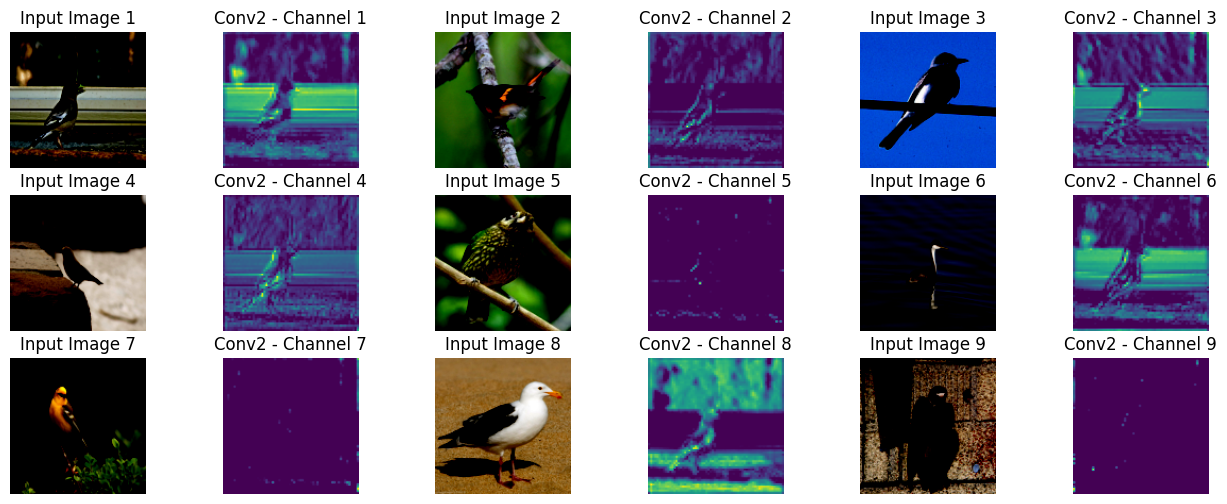

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


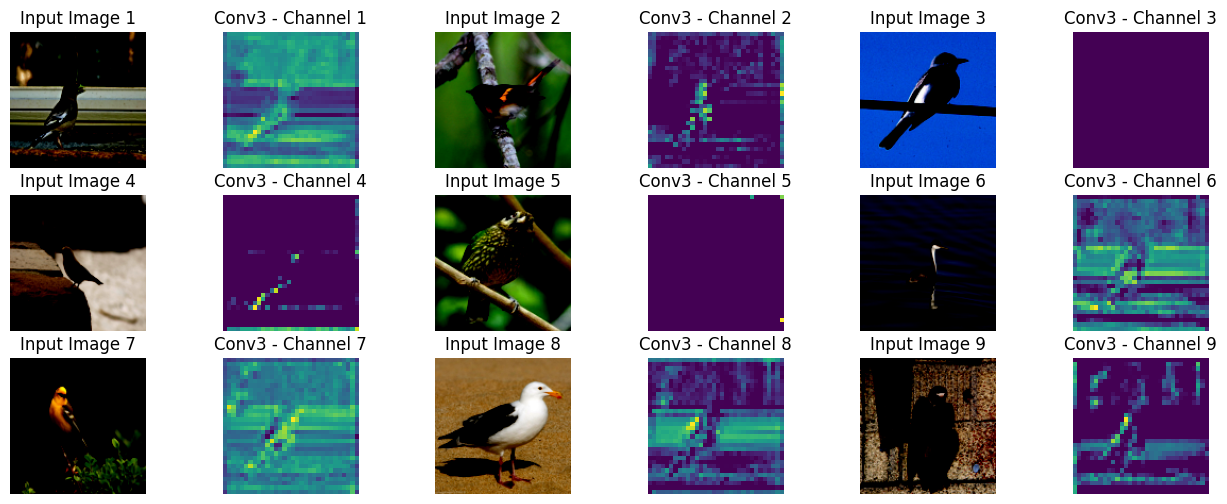

Output Tensor:
tensor([[-0.0540, -0.0155, -0.0127,  ..., -0.0414, -0.0234, -0.0414],
        [-0.0465, -0.0093, -0.0150,  ..., -0.0375, -0.0277, -0.0530],
        [-0.0546, -0.0110, -0.0074,  ..., -0.0307, -0.0207, -0.0486],
        ...,
        [-0.0476, -0.0158, -0.0222,  ..., -0.0298, -0.0311, -0.0438],
        [-0.0451, -0.0231, -0.0130,  ..., -0.0285, -0.0384, -0.0447],
        [-0.0525, -0.0174, -0.0156,  ..., -0.0314, -0.0339, -0.0433]],
       grad_fn=<AddmmBackward0>)


In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt


#  already have the train_loader from the previous code

# Get a batch of data from the training loader
sample_batch = next(iter(train_loader))
sample_images, _ = sample_batch

# Create an instance of your updated CNN
your_cnn = YourCNN()

# Forward pass through the network
x1, x2, x3, x_output = your_cnn(sample_images)

# Print the size of each tensor
print("Size of x1:", x1.size())
print("Size of x2:", x2.size())
print("Size of x3:", x3.size())
print("Size of x_output:", x_output.size())

# Visualize the output
def visualize_feature_maps_with_images(feature_map, layer_name, input_images):
    plt.figure(figsize=(16, 6))

    # Visualize input images
    for i in range(min(9, input_images.size(0))):
        plt.subplot(3, 6, 2 * i + 1)
        plt.imshow(input_images[i].permute(1, 2, 0))
        plt.title(f'Input Image {i + 1}')
        plt.axis('off')

    # Visualize feature maps
    for i in range(min(9, feature_map.size(1))):
        plt.subplot(3, 6, 2 * i + 2)
        plt.imshow(feature_map[0, i].detach().numpy(), cmap='viridis')
        plt.title(f'{layer_name} - Channel {i + 1}')
        plt.axis('off')

    plt.show()

# Visualize the intermediate feature maps with input images
visualize_feature_maps_with_images(x1, 'Conv1', sample_images)
visualize_feature_maps_with_images(x2, 'Conv2', sample_images)
visualize_feature_maps_with_images(x3, 'Conv3', sample_images)

# Display the output tensor
print("Output Tensor:")
print(x_output)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Size of x1: torch.Size([32, 28, 128, 128])
Size of x2: torch.Size([32, 44, 64, 64])
Size of x3: torch.Size([32, 76, 32, 32])
Size of x_output: torch.Size([32, 1000])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


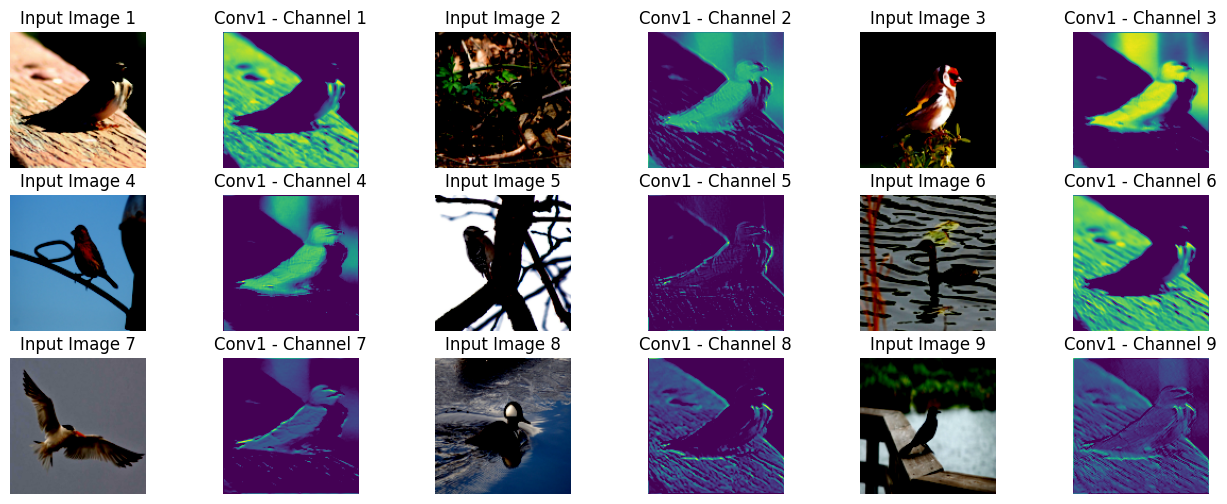

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


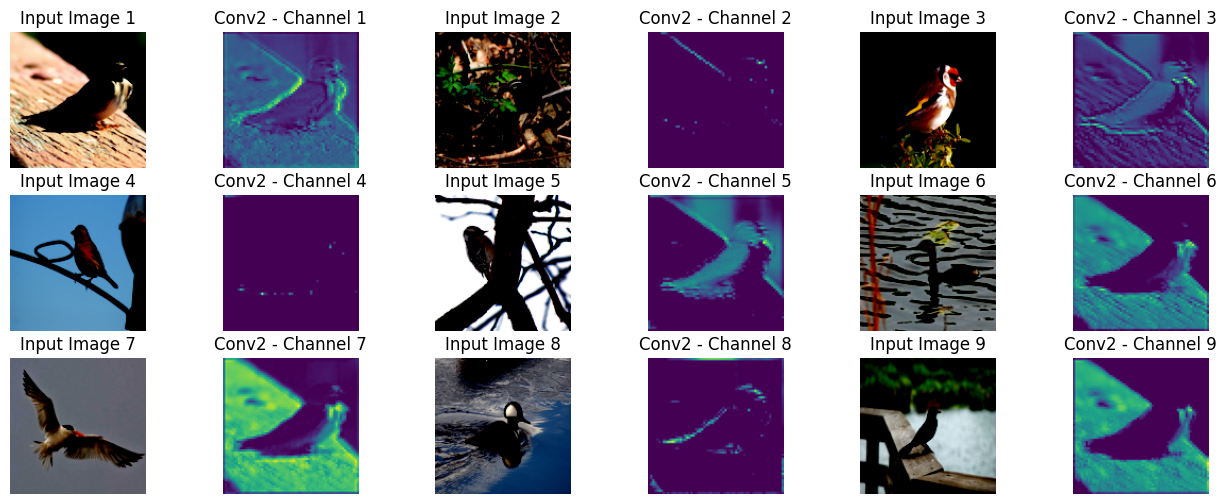

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


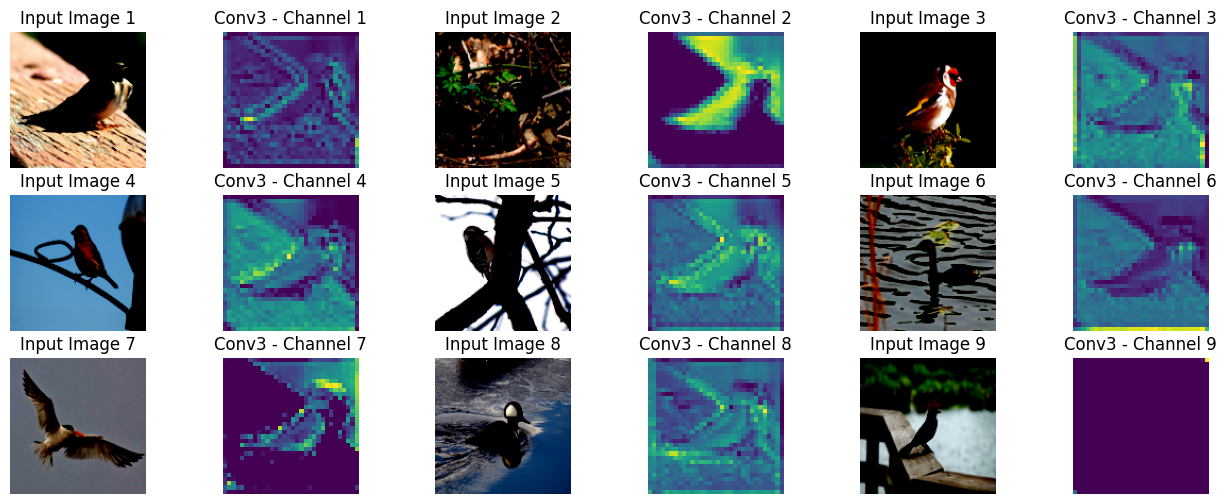

Output Tensor:
tensor([[ 0.0098, -0.0254, -0.0324,  ..., -0.0057,  0.0071,  0.0408],
        [ 0.0252, -0.0310, -0.0386,  ...,  0.0127, -0.0006,  0.0381],
        [ 0.0330, -0.0385, -0.0386,  ..., -0.0071,  0.0010,  0.0462],
        ...,
        [ 0.0370, -0.0258, -0.0287,  ..., -0.0031,  0.0157,  0.0395],
        [ 0.0331, -0.0229, -0.0333,  ...,  0.0074, -0.0010,  0.0395],
        [ 0.0398, -0.0294, -0.0345,  ..., -0.0011,  0.0025,  0.0419]],
       grad_fn=<AddmmBackward0>)


In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# already have the train_loader from the previous code

# Get a batch of data from the training loader
sample_batch = next(iter(test_loader))
sample_images, _ = sample_batch

# Create an instance of your updated CNN
your_cnn = YourCNN()

# Forward pass through the network
x1, x2, x3, x_output = your_cnn(sample_images)

# Print the size of each tensor
print("Size of x1:", x1.size())
print("Size of x2:", x2.size())
print("Size of x3:", x3.size())
print("Size of x_output:", x_output.size())

# Visualize the output
def visualize_feature_maps_with_images(feature_map, layer_name, input_images):
    plt.figure(figsize=(16, 6))

    # Visualize input images
    for i in range(min(9, input_images.size(0))):
        plt.subplot(3, 6, 2 * i + 1)
        plt.imshow(input_images[i].permute(1, 2, 0))
        plt.title(f'Input Image {i + 1}')
        plt.axis('off')

    # Visualize feature maps
    for i in range(min(9, feature_map.size(1))):
        plt.subplot(3, 6, 2 * i + 2)
        plt.imshow(feature_map[0, i].detach().numpy(), cmap='viridis')
        plt.title(f'{layer_name} - Channel {i + 1}')
        plt.axis('off')

    plt.show()

# Visualize the intermediate feature maps with input images
visualize_feature_maps_with_images(x1, 'Conv1', sample_images)
visualize_feature_maps_with_images(x2, 'Conv2', sample_images)
visualize_feature_maps_with_images(x3, 'Conv3', sample_images)

# Display the output tensor
print("Output Tensor:")
print(x_output)


In [18]:
import torch.nn.functional as F

class YourCNN(nn.Module):
    def __init__(self, num_channels=3, num_classes=1000):  # Adjust num_classes based on your task
        super(YourCNN, self).__init__()

        

        # First Convolutional Layer
        self.conv1 = nn.Conv2d(in_channels=num_channels, out_channels=num_filters1, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Second Convolutional Layer
        self.conv2 = nn.Conv2d(in_channels=num_filters1, out_channels=num_filters2, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Third Convolutional Layer
        self.conv3 = nn.Conv2d(in_channels=num_filters2, out_channels=num_filters3, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully Connected (FC) Layers
        self.fc1 = nn.Linear(num_filters3 * (image_height // 8) * (image_width // 8), 512)  # Adjust the input size
        self.fc2 = nn.Linear(512, num_classes)

        # Output Layer
        self.output_layer = nn.Linear(num_classes, num_classes)  # Use the same number of classes for input and output

    def forward(self, x):
        # Forward pass through the layers
        x1 = self.conv1(x)
        x1 = self.relu1(x1)
        x1_pooled = self.pool1(x1)

        x2 = self.conv2(x1_pooled)
        x2 = self.relu2(x2)
        x2_pooled = self.pool2(x2)

        x3 = self.conv3(x2_pooled)
        x3 = self.relu3(x3)
        x3_pooled = self.pool3(x3)

        # Flatten the output for the fully connected layers
        x_flat = x3_pooled.view(x3_pooled.size(0), -1)

        # Fully Connected (FC) Layers
        x_fc1 = F.relu(self.fc1(x_flat))
        x_fc2 = F.relu(self.fc2(x_fc1))

        # Output Layer with Softmax Activation
        x_output = F.softmax(self.output_layer(x_fc2), dim=1)

        return x1, x2, x3, x_fc2, x_output

# Create an instance of your updated CNN
your_cnn = YourCNN()

# Forward pass through the network
x1, x2, x3, x_fc2, x_output = your_cnn(sample_images)

# Print the size of each tensor
print("Size of x1:", x1.size())
print("Size of x2:", x2.size())
print("Size of x3:", x3.size())
print("Size of x_fc2:", x_fc2.size())
print("Size of x_output:", x_output.size())


Size of x1: torch.Size([32, 28, 128, 128])
Size of x2: torch.Size([32, 44, 64, 64])
Size of x3: torch.Size([32, 76, 32, 32])
Size of x_fc2: torch.Size([32, 1000])
Size of x_output: torch.Size([32, 1000])


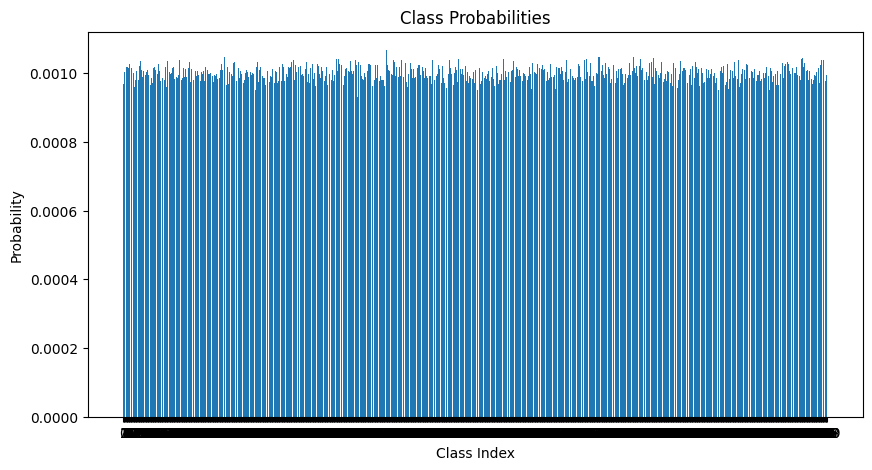

Predicted Class: 374


In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming x_output is the output tensor from your network
class_probabilities = x_output.detach().numpy()[0]  # Assuming you want to visualize the first example in the batch

# Get the predicted class (index with the highest probability)
predicted_class = np.argmax(class_probabilities)

# Plot the class probabilities
plt.figure(figsize=(10, 5))
plt.bar(range(len(class_probabilities)), class_probabilities)
plt.title('Class Probabilities')
plt.xlabel('Class Index')
plt.ylabel('Probability')
plt.xticks(range(len(class_probabilities)))
plt.show()

print(f"Predicted Class: {predicted_class}")


In [24]:
import torch.optim as optim

# the train_loader and test_loader from previous code
#  YourCNN class defined with the appropriate architecture

# Set device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create an instance of your CNN model
your_cnn = YourCNN().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(your_cnn.parameters(), lr=0.001)  # You may need to adjust the learning rate

# Training loop
num_epochs = 10  # Adjust as needed

for epoch in range(num_epochs):
    your_cnn.train()  # Set the model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        _, _, _, _, outputs = your_cnn(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Print average training loss and accuracy for the epoch
    avg_loss_train = running_loss / len(train_loader)
    accuracy_train = correct_train / total_train
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss_train:.4f}, Accuracy: {accuracy_train * 100:.2f}%")

    # Validation loop
    your_cnn.eval()  # Set the model to evaluation mode
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            _, _, _, _, outputs = your_cnn(inputs)

            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    # Calculate validation accuracy
    accuracy_val = correct_val / total_val
    print(f"Validation Accuracy: {accuracy_val * 100:.2f}%")


Epoch 1/10, Loss: 5.9184, Accuracy: 99.66%
Validation Accuracy: 100.00%
Epoch 2/10, Loss: 5.9095, Accuracy: 100.00%
Validation Accuracy: 100.00%
Epoch 3/10, Loss: 5.9095, Accuracy: 100.00%
Validation Accuracy: 100.00%
Epoch 4/10, Loss: 5.9095, Accuracy: 100.00%
Validation Accuracy: 100.00%
Epoch 5/10, Loss: 5.9095, Accuracy: 100.00%
Validation Accuracy: 100.00%
Epoch 6/10, Loss: 5.9095, Accuracy: 100.00%
Validation Accuracy: 100.00%
Epoch 7/10, Loss: 5.9095, Accuracy: 100.00%
Validation Accuracy: 100.00%
Epoch 8/10, Loss: 5.9095, Accuracy: 100.00%
Validation Accuracy: 100.00%
Epoch 9/10, Loss: 5.9095, Accuracy: 100.00%
Validation Accuracy: 100.00%
Epoch 10/10, Loss: 5.9095, Accuracy: 100.00%
Validation Accuracy: 100.00%


In [28]:
import torch.nn.functional as F

class YourCNN(nn.Module):
    def __init__(self, num_channels=3, num_classes=1000, dropout_rate=0.5):  # Adjust num_classes based on your task
        super(YourCNN, self).__init__()

        # ... Previous convolutional layers ...

        # First Convolutional Layer
        self.conv1 = nn.Conv2d(in_channels=num_channels, out_channels=num_filters1, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.batch_norm1 = nn.BatchNorm2d(num_filters1)  # Added batch normalization
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout2d(p=dropout_rate)  # Added dropout

        # Second Convolutional Layer
        self.conv2 = nn.Conv2d(in_channels=num_filters1, out_channels=num_filters2, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.batch_norm2 = nn.BatchNorm2d(num_filters2)  # Added batch normalization
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout2 = nn.Dropout2d(p=dropout_rate)  # Added dropout

        # Third Convolutional Layer
        self.conv3 = nn.Conv2d(in_channels=num_filters2, out_channels=num_filters3, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.batch_norm3 = nn.BatchNorm2d(num_filters3)  # Added batch normalization
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout3 = nn.Dropout2d(p=dropout_rate)  # Added dropout

        # Fully Connected (FC) Layers
        self.fc1 = nn.Linear(num_filters3 * (image_height // 8) * (image_width // 8), 512)
        self.relu_fc1 = nn.ReLU()
        self.batch_norm_fc1 = nn.BatchNorm1d(512)  # Added batch normalization
        self.dropout_fc1 = nn.Dropout(p=dropout_rate)  # Added dropout
        self.fc2 = nn.Linear(512, num_classes)

        # Output Layer
        self.output_layer = nn.Linear(num_classes, num_classes)  # Use the same number of classes for input and output

    def forward(self, x):
        # Forward pass through the layers
        x1 = self.conv1(x)
        x1 = self.relu1(x1)
        x1 = self.batch_norm1(x1)  # Apply batch normalization
        x1_pooled = self.pool1(x1)
        x1_drop = self.dropout1(x1_pooled)  # Apply dropout

        x2 = self.conv2(x1_drop)
        x2 = self.relu2(x2)
        x2 = self.batch_norm2(x2)  # Apply batch normalization
        x2_pooled = self.pool2(x2)
        x2_drop = self.dropout2(x2_pooled)  # Apply dropout

        x3 = self.conv3(x2_drop)
        x3 = self.relu3(x3)
        x3 = self.batch_norm3(x3)  # Apply batch normalization
        x3_pooled = self.pool3(x3)
        x3_drop = self.dropout3(x3_pooled)  # Apply dropout

        # Flatten the output for the fully connected layers
        x_flat = x3_drop.view(x3_drop.size(0), -1)

        # Fully Connected (FC) Layers
        x_fc1 = self.fc1(x_flat)
        x_fc1 = self.relu_fc1(x_fc1)
        x_fc1 = self.batch_norm_fc1(x_fc1)  # Apply batch normalization
        x_fc1 = self.dropout_fc1(x_fc1)  # Apply dropout
        x_fc2 = self.fc2(x_fc1)

        # Output Layer with Softmax Activation
        x_output = F.softmax(self.output_layer(x_fc2), dim=1)

        return x1, x2, x3, x_fc2, x_output

# Create an instance of your updated CNN
your_cnn = YourCNN()

# Forward pass through the network
x1, x2, x3, x_fc2, x_output = your_cnn(sample_images)
# Print the size of each tensor
print("Size of x1:", x1.size())
print("Size of x2:", x2.size())
print("Size of x3:", x3.size())
print("Size of x_fc2:", x_fc2.size())

# Note: x_fc2_normalized was not defined in your code, so removing this line to avoid an error

print("Size of x_output:", x_output.size())

# Display the output tensor
print("Output Tensor:")
print(x_output)



Size of x1: torch.Size([32, 28, 128, 128])
Size of x2: torch.Size([32, 44, 64, 64])
Size of x3: torch.Size([32, 76, 32, 32])
Size of x_fc2: torch.Size([32, 1000])
Size of x_output: torch.Size([32, 1000])
Output Tensor:
tensor([[0.0014, 0.0014, 0.0010,  ..., 0.0009, 0.0007, 0.0035],
        [0.0016, 0.0007, 0.0009,  ..., 0.0021, 0.0007, 0.0005],
        [0.0009, 0.0015, 0.0008,  ..., 0.0005, 0.0018, 0.0009],
        ...,
        [0.0014, 0.0007, 0.0008,  ..., 0.0008, 0.0008, 0.0010],
        [0.0009, 0.0006, 0.0004,  ..., 0.0005, 0.0013, 0.0008],
        [0.0009, 0.0005, 0.0028,  ..., 0.0005, 0.0008, 0.0005]],
       grad_fn=<SoftmaxBackward0>)


In [30]:
import torch.optim as optim

#  the train_loader and test_loader from previous code
#  YourCNN class defined with the appropriate architecture

# Set device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create an instance of your CNN model
your_cnn = YourCNN().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(your_cnn.parameters(), lr=0.001)  # You may need to adjust the learning rate

# Training loop
num_epochs = 10  # Adjust as needed

for epoch in range(num_epochs):
    your_cnn.train()  # Set the model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        _, _, _, _, outputs = your_cnn(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Print average training loss and accuracy for the epoch
    avg_loss_train = running_loss / len(train_loader)
    accuracy_train = correct_train / total_train
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss_train:.4f}, Accuracy: {accuracy_train * 100:.2f}%")

    # Validation loop
    your_cnn.eval()  # Set the model to evaluation mode
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            _, _, _, _, outputs = your_cnn(inputs)

            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    # Calculate validation accuracy
    accuracy_val = correct_val / total_val
    print(f"Validation Accuracy: {accuracy_val * 100:.2f}%")


Epoch 1/10, Loss: 6.1696, Accuracy: 75.32%
Validation Accuracy: 85.96%
Epoch 2/10, Loss: 6.0880, Accuracy: 82.41%
Validation Accuracy: 88.34%
Epoch 3/10, Loss: 6.0565, Accuracy: 85.46%
Validation Accuracy: 91.31%
Epoch 4/10, Loss: 6.0124, Accuracy: 89.85%
Validation Accuracy: 100.00%
Epoch 5/10, Loss: 5.9355, Accuracy: 97.56%
Validation Accuracy: 100.00%
Epoch 6/10, Loss: 5.9114, Accuracy: 99.83%
Validation Accuracy: 100.00%
Epoch 7/10, Loss: 5.9108, Accuracy: 99.88%
Validation Accuracy: 100.00%
Epoch 8/10, Loss: 5.9100, Accuracy: 99.95%
Validation Accuracy: 100.00%
Epoch 9/10, Loss: 5.9099, Accuracy: 99.96%
Validation Accuracy: 100.00%
Epoch 10/10, Loss: 5.9100, Accuracy: 99.95%
Validation Accuracy: 100.00%


Accuracy: 100.00%
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


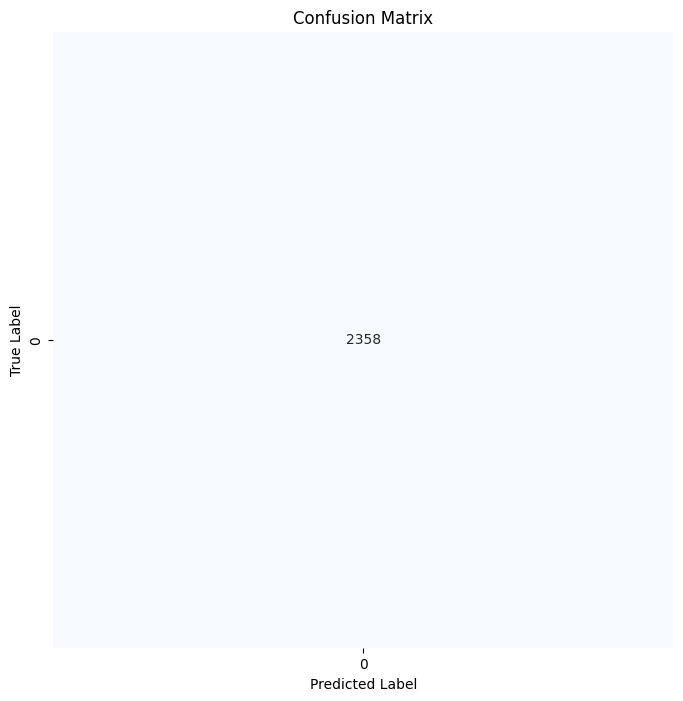

['My_model.pkl']

In [31]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

#  the test_loader from the previous code

# Evaluation loop
your_cnn.eval()  # Set the model to evaluation mode
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        _, _, _, _, outputs = your_cnn(inputs)

        _, predicted = torch.max(outputs.data, 1)
        
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert lists to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(all_labels, all_predictions)
precision, recall, f1_score, _ = precision_recall_fscore_support(all_labels, all_predictions, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

# Visualize confusion matrix
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Save the model
joblib.dump(your_cnn, 'My_model.pkl')


In [36]:
import torch.optim as optim

#  the train_loader and validation_loader from previous code
#  YourCNN class defined with the appropriate architecture

# Set device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define hyperparameters to tune
learning_rates = [0.1]
batch_sizes = [32]
num_epochs = 4  # Adjust as needed

# Dictionary to store results
results = {}

for lr in learning_rates:
    for batch_size in batch_sizes:
        # Create an instance of your CNN model
        your_cnn = YourCNN().to(device)

        # Define loss function and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(your_cnn.parameters(), lr=lr)

        # Training loop
        for epoch in range(num_epochs):
            your_cnn.train()  # Set the model to training mode
            running_loss = 0.0

            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()

                # Forward pass
                _, _, _, _, outputs = your_cnn(inputs)

                # Calculate the loss
                loss = criterion(outputs, labels)

                # Backward pass and optimization
                loss.backward()
                optimizer.step()

                running_loss += loss.item()

            # Print average training loss for the epoch
            avg_loss_train = running_loss / len(train_loader)
            print(f"Epoch {epoch + 1}/{num_epochs}, Learning Rate: {lr}, Batch Size: {batch_size}, Loss: {avg_loss_train:.4f}")

        # Validation loop
        your_cnn.eval()  # Set the model to evaluation mode
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                _, _, _, _, outputs = your_cnn(inputs)

                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        # Calculate validation accuracy
        accuracy_val = correct_val / total_val
        print(f"Validation Accuracy: {accuracy_val * 100:.2f}%")

        # Store results in the dictionary
        results[(lr, batch_size)] = accuracy_val

# Print the results
for (lr, batch_size), accuracy in results.items():
    print(f"Learning Rate: {lr}, Batch Size: {batch_size}, Accuracy: {accuracy * 100:.2f}%")


Epoch 1/4, Learning Rate: 0.1, Batch Size: 32, Loss: 6.2830
Epoch 2/4, Learning Rate: 0.1, Batch Size: 32, Loss: 6.1275
Epoch 3/4, Learning Rate: 0.1, Batch Size: 32, Loss: 6.1134
Epoch 4/4, Learning Rate: 0.1, Batch Size: 32, Loss: 6.1853
Validation Accuracy: 97.84%
Learning Rate: 0.1, Batch Size: 32, Accuracy: 97.84%
